### K-Means算法步骤：
吴恩达老是的练习只讲了其中的核心：是对其中一部分数据点使用kmeans算法进行分类
<img src='pic/my_note.jpg' width='60%' height='60%'>


(300, 2)


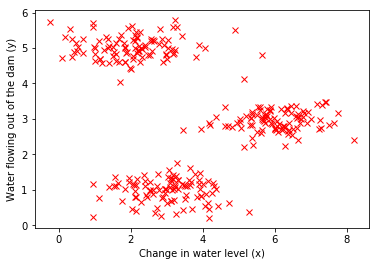

In [83]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


mat_data = sio.loadmat('data/ex7data2.mat')
# print 'mat_data.keys()',mat_data.keys()
X = mat_data['X']
print X.shape


#查看数据分布
plt.figure()
plt.plot(X[:,0].ravel(), X[:,1].ravel(), linestyle='', marker='x', color='r')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [74]:
import sys
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    centroids : ndarray, shape (K, n_features)
        The current centroids, where K is the number of centroids.

    Returns
    -------
    idx : ndarray, shape (n_samples, 1)
        Centroid assignments. idx[i] contains the index of the centroid closest to sample i.
    """
    m = X.shape[0]
    ids = np.zeros(m)
#     distance = np.ones(m)*sys.maxint
#     K = centroids.shape[0]
#     for i in range(K) :
#         k = centroids[i]
#         for m_idx in range(m) :
#             x = X[m_idx]
#             dis = np.square(x[0]-k[0]) + np.square(x[1] - k[1])
#             if dis < distance[m_idx] :
#                 ids[m_idx] = i
#                 distance[m_idx] = dis
    for i in range(m):
        x = X[i]
        dist = np.sum(np.square(centroids - x), axis=1)
        ids[i] = np.argmin(dist)

    return ids
        

In [75]:
# Select an initial set of centroids
K = 3  # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = find_closest_centroids(X, initial_centroids)

print 'Closest centroids for the first 3 examples: ', idx[0:3]
print '(the closest centroids should be 0, 2, 1 respectively)'

Closest centroids for the first 3 examples:  [ 0.  2.  1.]
(the closest centroids should be 0, 2, 1 respectively)


In [76]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points assigned to each centroid.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    idx : ndarray, shape(n_samples, 1)
        Centroid assignments.
    K : int
        The number of centroids.

    Returns
    -------
    centroids : ndarray, shape (K, n_features)
        New centroids, each row of which is the mean of the data points assigned to it.

    """
    (m, n) = X.shape
    centroids = np.zeros((K,n))
    for k in range(K):
        k_x = X[idx==k,:]
        centroids[k] = np.mean(k_x, axis=0)
                
    return centroids

In [77]:
centroids = compute_centroids(X, idx, K)
print 'Centroids computed after initial finding of closest centroids:'
print centroids
print '(the centroids should be [ 2.428301 3.157924 ], [ 5.813503 2.633656 ], [ 7.119387 3.616684 ])'

Centroids computed after initial finding of closest centroids:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]
(the centroids should be [ 2.428301 3.157924 ], [ 5.813503 2.633656 ], [ 7.119387 3.616684 ])


In [78]:
# 核心理解：重新计算centroids的时候，并不是以中位数，而是平均数，所以计算后再计算find_closest_centroids的时候，很多点的中心点就会变好
def run_k_means(X, initial_centroids, max_iters, plot_progress=False):
    centroids = initial_centroids
    m,n = X.shape
    K = centroids.shape[0]
    idx = np.zeros(m)
    for it in range(max_iters) :
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    
        if plot_progress :
            plt.figure()
            # plot data
            plt.plot(X[idx==0,0].ravel(), X[idx==0,1].ravel(), linestyle='', marker='o', color='y')
            plt.plot(X[idx==1,0].ravel(), X[idx==1,1].ravel(), linestyle='', marker='o', color='g')
            plt.plot(X[idx==2,0].ravel(), X[idx==2,1].ravel(), linestyle='', marker='o', color='b')

            # plot centroids
            plt.plot(centroids[:,0].ravel(), centroids[:,1], linestyle='', marker='x', color='r')
            
            plt.show()
    
    return centroids, idx

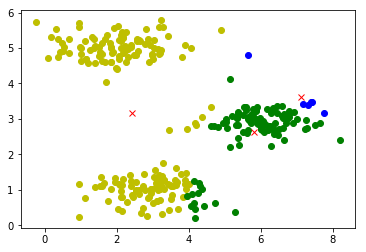

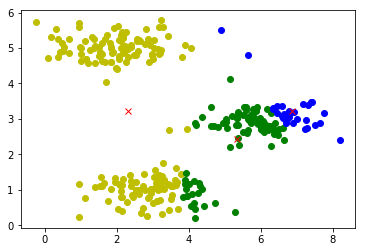

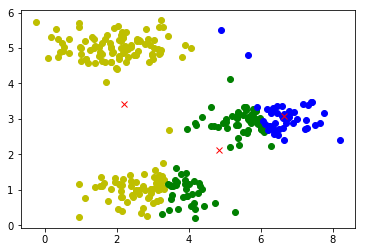

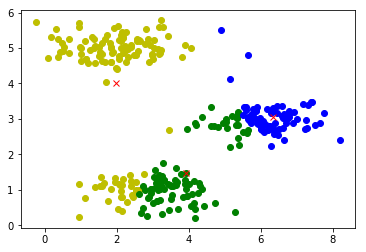

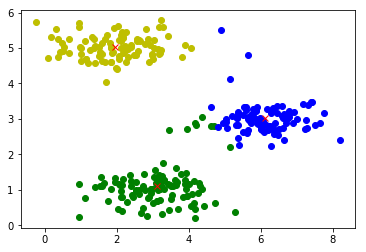

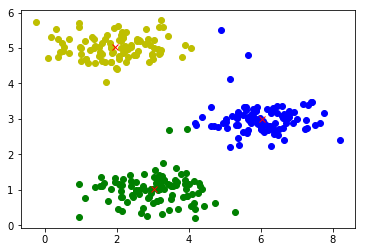

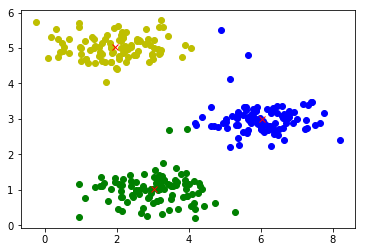

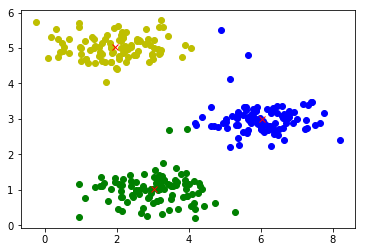

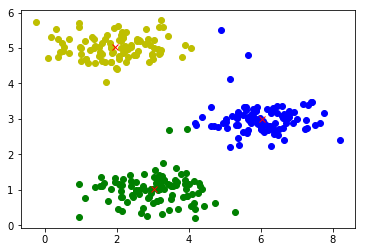

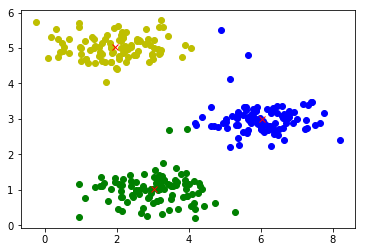

K-Means Done.


In [79]:
# Load an example dataset
mat_data = sio.loadmat('data/ex7data2.mat')
X = mat_data['X']

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values but in practice you want to generate them automatically,
# such as by settings them to be random examples (as can be seen in k_means_init_centroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm
centroids, idx = run_k_means(X, initial_centroids, max_iters, True)
print 'K-Means Done.'



In [80]:
def k_means_init_centroids(X, K):
    """
    Initializes K centroids that are to be used in K-Means on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    K : int
        The number of centroids.

    Returns
    -------
    centroids : ndarray, shape (K, n_features)
        Randomly initialized centroids, each row of which is the mean of the data points assigned to it.
    """
    rand_idx = np.random.permutation(X.shape[0])
    centroids = X[rand_idx[0:K], :]
    return centroids


In [84]:
from scipy.misc import imread


# Load an image of a bird
A = imread('data/bird_small.png')
A = A.astype(float)/255
print 'A.shape = ',A.shape
# Size of the image
img_size = A.shape
print 'img_size = ',img_size
# Reshape the image into an Nx3 matrix where N = number of pixels.
X = A.reshape([img_size[0] * img_size[1], img_size[2]])

K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids randomly.
initial_centroids = k_means_init_centroids(X, K)

# Run K-Means
centroids, idx = run_k_means(X, initial_centroids, max_iters)


A.shape =  (128, 128, 3)
img_size =  (128, 128, 3)


### Part 5: Image Compression
Then we can apply K-means to compress the image. The original images uses 24 bit color. With the 16 centroids we've found in the previous part, we can map the 24 bit color to 16 bit.

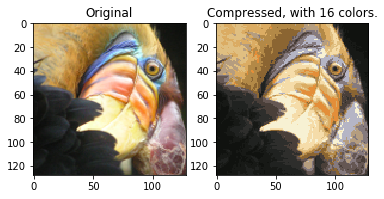

In [88]:
idx = find_closest_centroids(X, centroids)

# Recover the image from the indices (idx) by mapping each pixel (specified by its index in idx) to the centroid value.
# 对24像素的图像压缩为16像素：就是以这16簇为中心，把坐标替换为距离自己最近的点的坐标，这样就只有16个不同的像素点，并不是在存储上进行压缩
X_recovered = centroids[idx.astype(int), :]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size)

fig = plt.figure()
# Display the original image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(A)
ax1.set_title('Original')
# Display compressed image side by side
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(X_recovered)
ax2.set_title('Compressed, with {} colors.'.format(K))
plt.show()
